# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Импортируем необходимые для работы библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.options.display.float_format = '{:.2f}'.format

Загрузим данные из файла в датафрейм с разделителем `sep = '\t'`

In [2]:
try: 
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t') 
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')

Проверим правильность загрузки данных, посмотрим первые пять строк таблицы.

In [3]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.00,108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.00,16028.00,1.00,482.00,2.00,755.00,NaN
1,7,3350000.00,40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,12817.00,18603.00,0.00,NaN,0.00,NaN,81.00
2,10,5196000.00,56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,21741.00,13933.00,1.00,90.00,2.00,574.00,558.00
3,0,64900000.00,159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,28098.00,6800.00,2.00,84.00,3.00,234.00,424.00
4,2,10000000.00,100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.00,8098.00,2.00,112.00,1.00,48.00,121.00


Посмотрим типы данных и кол-во ненулевых значений

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.00,9.86,5.68,0.00,6.00,9.00,14.00,50.00
last_price,23699.00,6541548.77,10887013.27,12190.00,3400000.00,4650000.00,6800000.00,763000000.00
total_area,23699.00,60.35,35.65,12.00,40.00,52.00,69.90,900.00
rooms,23699.00,2.07,1.08,0.00,1.00,2.00,3.00,19.00
ceiling_height,14504.00,2.77,1.26,1.00,2.52,2.65,2.80,100.00
floors_total,23613.00,10.67,6.60,1.00,5.00,9.00,16.00,60.00
living_area,21796.00,34.46,22.03,2.00,18.60,30.00,42.30,409.70
floor,23699.00,5.89,4.89,1.00,2.00,4.00,8.00,33.00
kitchen_area,21421.00,10.57,5.91,1.30,7.00,9.10,12.00,112.00
balcony,12180.00,1.15,1.07,0.00,0.00,1.00,2.00,5.00


Построим общую гистограмму для всех столбцов

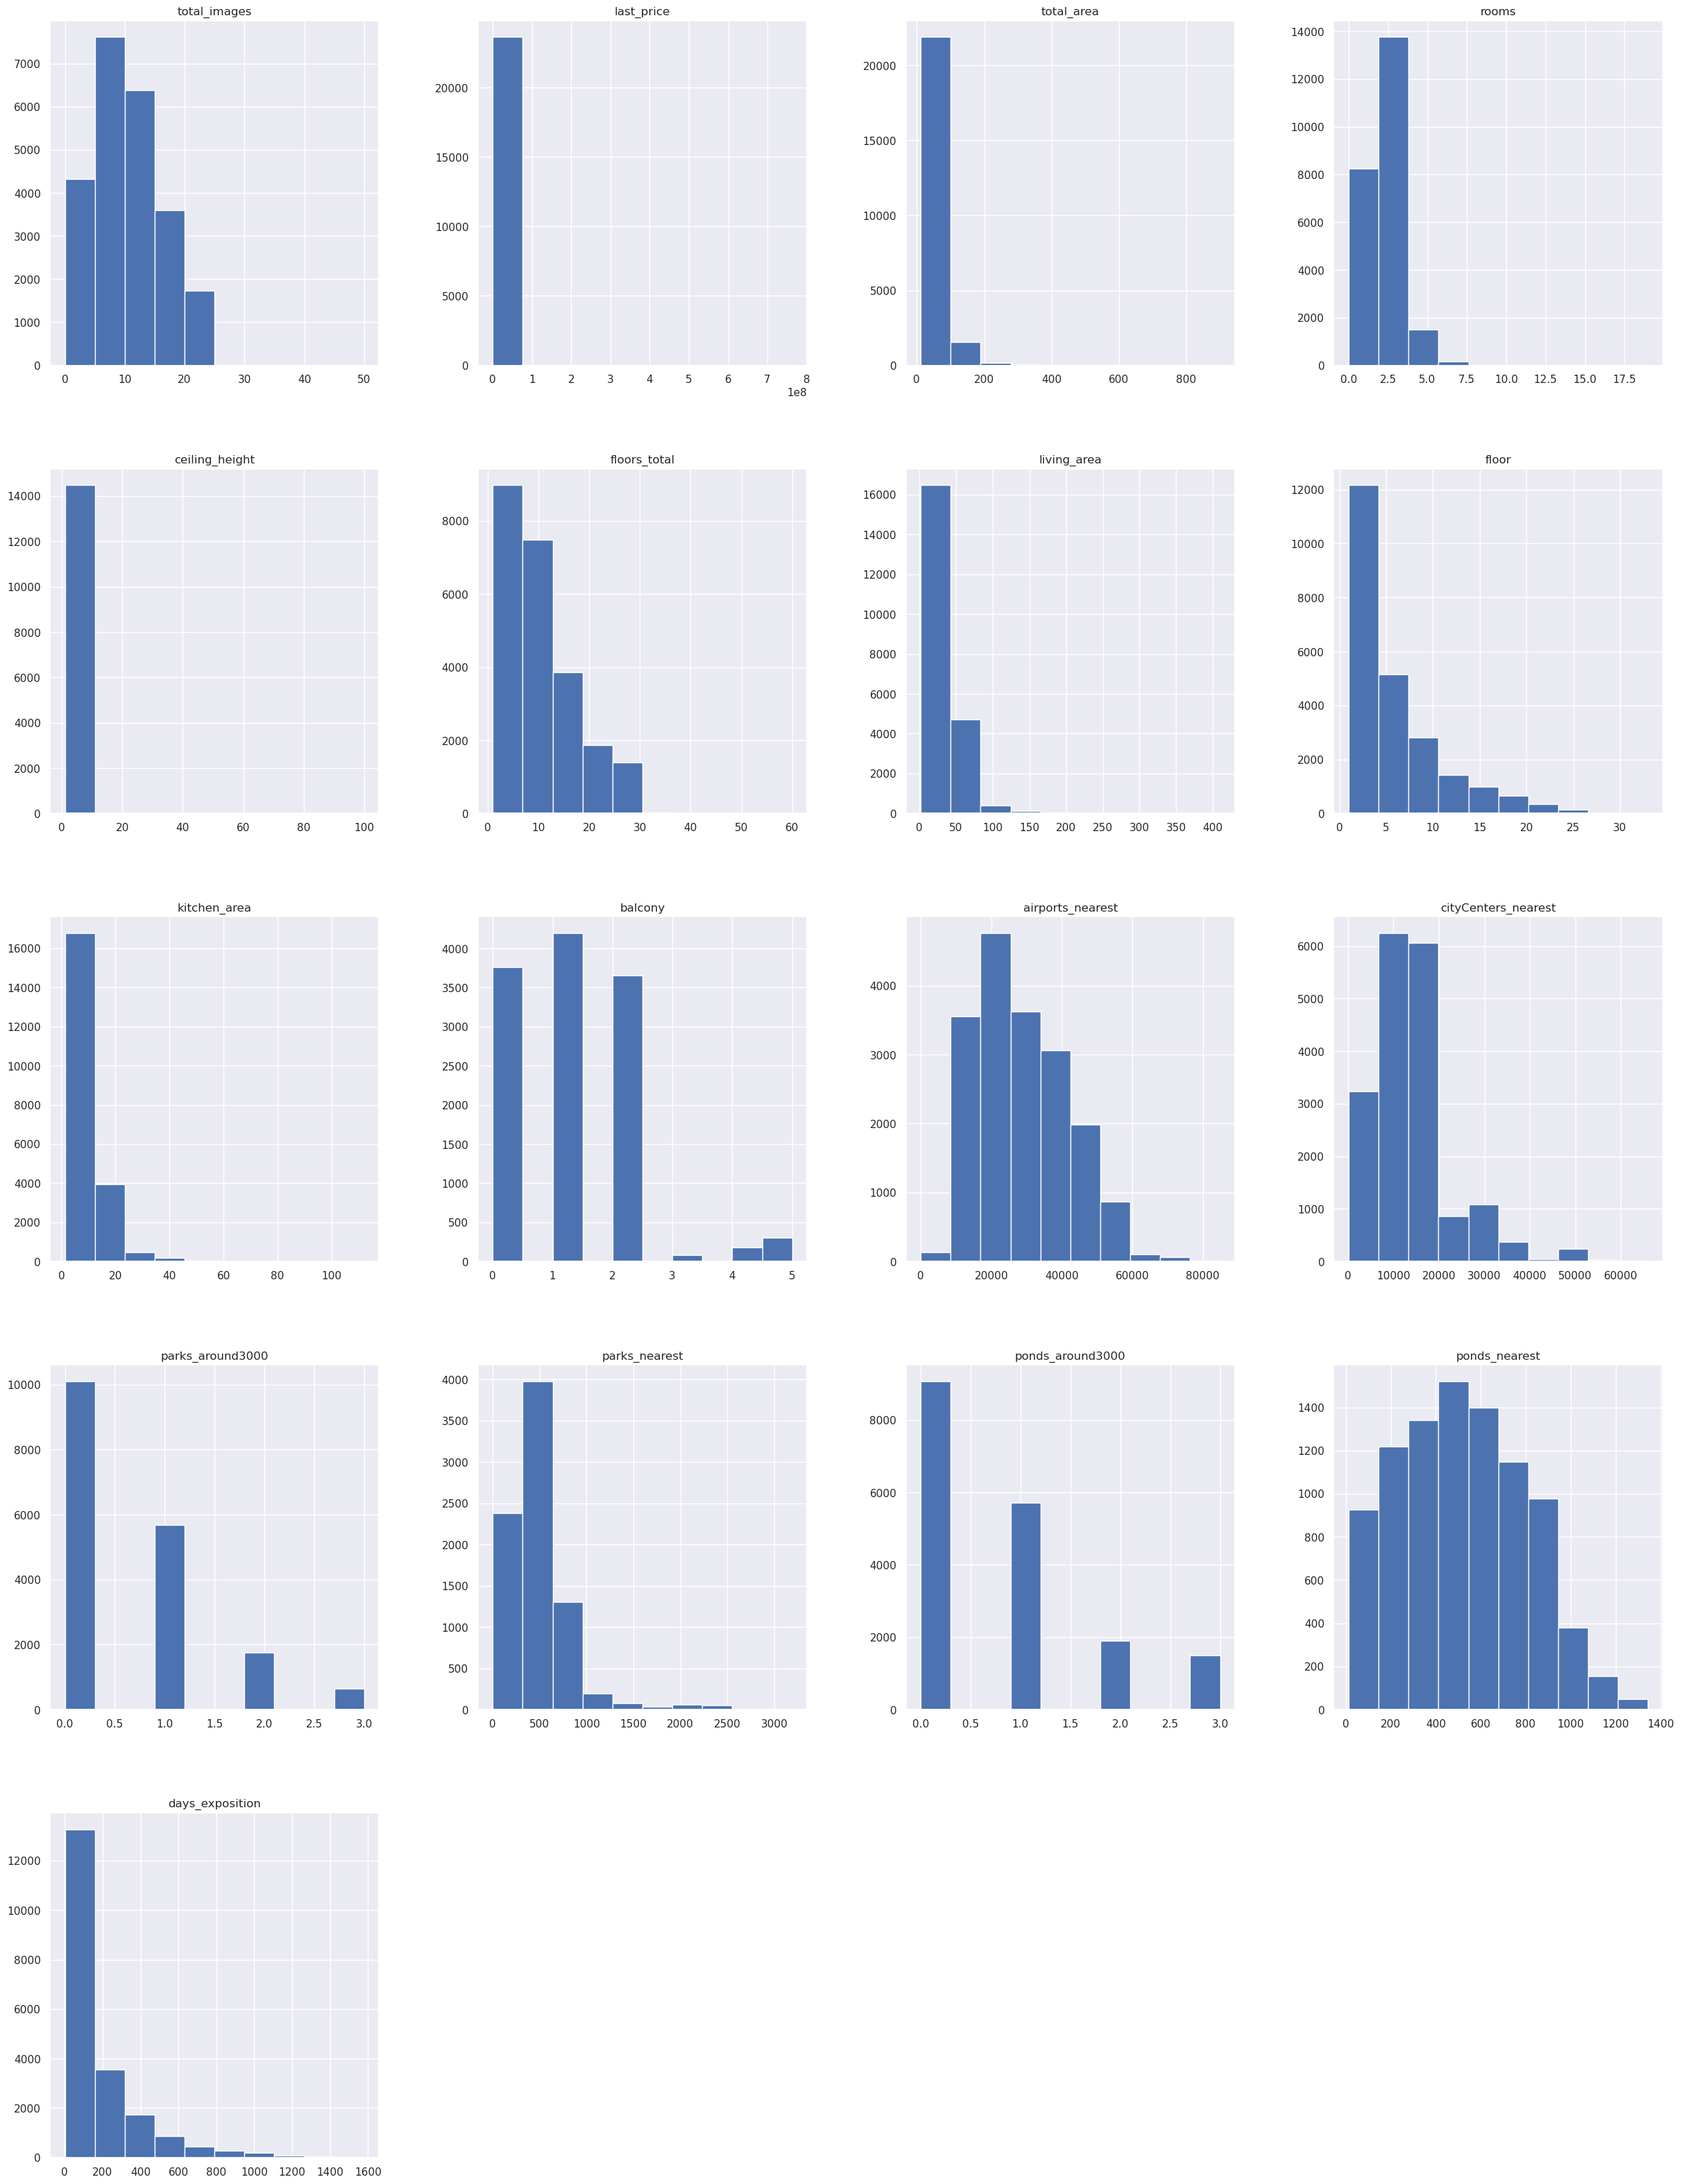

In [6]:
data.hist(figsize=(30, 40))
plt.show()

**Из приведенной информации можно увидеть ненулевые значения и несообтветствия типов данных**
- `total_images` - ненулевых значений нет, тип  данных заменим на оптимальный
- `last_price` - ненулевых значений нет, тип данных верный
- `total_area` - ненулевых значений нет, тип данных верный
- `first_day_exposition` - ненулевых значений нет, тип данных *object* должен быть заменен на *datetime64*
- `rooms` - ненулевых значений нет, тип  данных заменим на оптимальный
- `ceiling_height` - есть нулевые значения, тип данных верный
- `floors_total` - есть нулевые значения, тип данных *float64* нужно заменить на *int*, т. к. количество этажей целое число
- `living_area` - есть нулевые значения, тип данных верный
- `floor` - ненулевых значений нет, тип  данных заменим на оптимальный  
- `is_apartment` - есть нулевые значения, тип данных *object* должен быть заменен на *bool*
- `studio` - ненулевых значений нет, тип данных верный
- `open_plan` - ненулевых значений нет, тип данных верный    
- `kitchen_area` - есть нулевые значения, тип данных верный       
- `balcony` -  есть нулевые значения, тип данных *float64* нужно заменить на *int*, т. к. количество балконов целое число     
- `locality_name` - есть нулевые значения, тип данных верный         
- `airports_nearest` - есть нулевые значения, тип данных верный     
- `cityCenters_nearest` - есть нулевые значения, тип данных верный  
- `parks_around3000` - есть нулевые значения, тип данных *float64* нужно заменить на *int*, т. к. количество парков целое число      
- `parks_nearest` - есть нулевые значения, тип данных верный         
- `ponds_around3000` - есть нулевые значения, тип данных *float64* нужно заменить на *int*, т. к. количество прудов целое число      
- `ponds_nearest` - есть нулевые значения, тип данных верный         
- `days_exposition` - есть нулевые значения, тип данных *float64* нужно заменить на *int*, т. к. количество дней целое число 

### Предобработка данных

**Поэтапно заменим типы данных, разберемся с пропущенными значениями и выявим неявные дубликаты данных**

**1.** Заменим в столбце `first_day_exposition` тип данных на *datetime*

In [7]:
#переведем столбец с датой в формат даты без времени
FORMAY_DATE = '%Y-%m-%d' 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = FORMAY_DATE)

**2.** Разберемся с ненулевыми значениями в столбце `ceiling_height` 

In [8]:
# выводим на экран последние 20 значений высоты потолков с условием высоты потолков больше 4.5 метров. 
# Такие потолки иногда встечаются в так называемых "Сталинках"
data[data['ceiling_height'] > 4.5].sort_values('ceiling_height').tail(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18545,6,3750000.00,43.00,2019-03-18,2,25.00,5.00,29.00,3,False,...,NaN,NaN,Санкт-Петербург,27054.00,8033.00,1.00,540.00,0.00,NaN,12.00
355,17,3600000.00,55.20,2018-07-12,2,25.00,5.00,32.00,2,False,...,NaN,2.00,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.00
11285,0,1950000.00,37.00,2019-03-20,1,25.00,5.00,17.00,4,False,...,9.00,2.00,Луга,NaN,NaN,NaN,NaN,NaN,NaN,18.00
4643,0,4300000.00,45.00,2018-02-01,2,25.00,9.00,30.00,2,NaN,...,7.00,1.00,Санкт-Петербург,12016.00,13256.00,1.00,658.00,1.00,331.00,181.00
9379,5,3950000.00,42.00,2017-03-26,3,25.00,5.00,30.00,2,NaN,...,5.20,NaN,Санкт-Петербург,11647.00,13581.00,0.00,NaN,0.00,NaN,NaN
6246,6,3300000.00,44.40,2019-03-25,2,25.00,5.00,31.30,5,NaN,...,5.70,NaN,Кронштадт,68923.00,50649.00,1.00,417.00,2.00,73.00,NaN
14382,9,1700000.00,35.00,2015-12-04,1,25.00,5.00,20.00,2,False,...,8.00,1.00,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,206.00
5669,4,4400000.00,50.00,2017-08-08,2,26.00,9.00,21.30,3,NaN,...,7.00,2.00,Санкт-Петербург,28981.00,10912.00,1.00,305.00,0.00,NaN,267.00
5246,0,2500000.00,54.00,2017-10-13,2,27.00,5.00,30.00,3,NaN,...,9.00,2.00,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.00
21824,20,2450000.00,44.00,2019-02-12,2,27.00,2.00,38.00,2,False,...,8.60,2.00,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Мы видим один выброс в 100 м (это видимо ошибочный ввод) и есть значения: 25.0 м, 26.0 м, 27.0 м, 27,5 м и 32.0 м. Это скорее всего печатки. Должно быть 2.5, 2.6, 2.7, 2.75 и 3.2 метра.
Заменим данные значения с помощью логических выражений в атрибуте loс. Заменим пропуски на мединное значение. В стобце так же присутствуют значения ниже 2-х метров и больше 5 метров - их тоже заменим на медианное значение.

In [9]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data['ceiling_height'] / 10
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
data.loc[(data['ceiling_height'] > 5.0) | (data['ceiling_height'] < 2), 'ceiling_height'] = data['ceiling_height'].median()

Посмотрим с помощью `describe()` среднее и медиану

In [10]:
data['ceiling_height'].describe()

count   23699.00
mean        2.70
std         0.22
min         2.00
25%         2.60
50%         2.65
75%         2.70
max         5.00
Name: ceiling_height, dtype: float64

Cреднее 2.70 и медиана  2.65 м находятся в стандартных значениях высоты потолков, поэтому оставляем значения в таком виде.

**3.** Посмотрим уникальные значения в столбце `floors_total` при помощи *unique()* и пропущенные значения при помощи *isna()*

In [11]:
data['floors_total'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 33., 34., 35., 36., 37., 52., 60., nan])

In [12]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.00,65.20,2018-10-02,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.00,12373.00,1.00,123.00,0.00,NaN,49.00
237,4,2438033.00,28.10,2016-11-23,1,2.65,NaN,20.75,1,NaN,...,NaN,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,251.00
457,4,9788348.00,70.80,2015-08-01,2,2.65,NaN,38.40,12,NaN,...,10.63,0.00,Санкт-Петербург,37364.00,8322.00,2.00,309.00,2.00,706.00,727.00
671,4,6051191.00,93.60,2017-04-06,3,2.65,NaN,47.10,8,NaN,...,16.80,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,123.00
1757,5,3600000.00,39.00,2017-04-22,1,2.65,NaN,NaN,9,NaN,...,NaN,0.00,Санкт-Петербург,22735.00,11618.00,1.00,835.00,1.00,652.00,77.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.00,63.50,2017-05-24,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.00,15363.00,0.00,NaN,1.00,853.00,512.00
22656,4,4574160.00,64.50,2017-04-02,2,2.65,NaN,31.70,20,NaN,...,14.40,0.00,Санкт-Петербург,22041.00,17369.00,0.00,NaN,1.00,374.00,127.00
22808,0,14569263.00,110.40,2016-11-20,3,2.65,NaN,45.38,6,NaN,...,23.42,0.00,Санкт-Петербург,19095.00,4529.00,0.00,NaN,0.00,NaN,260.00
23590,0,21187872.00,123.30,2017-04-25,3,2.65,NaN,50.40,18,NaN,...,23.60,0.00,Санкт-Петербург,19095.00,4529.00,0.00,NaN,0.00,NaN,104.00


Мы видим достаточно большой разброс по этажности и так же непонятна причина пропусков значений (зависимости от других параметров не видно). Оставляем без изменений. Тип данных изменить не получится, т.к. есть NaN. Nan в int не преобразуется.

**4.** `living_area` и `kitchen_area` есть пропущенные значения, Поскольку в значениях общей площади нету нулей можно  высчитать для строк с пропусками жилую площадь и площадь кухни через средний коэфиициент отношения этих параметров к общей площади и заменить эти значения на параметры полученные при умножении коэффициента на общую площадь. 

In [13]:
living_area_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_area_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_area_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_area_ratio  * data['total_area'], inplace=True)

**5.** Заменим пропущеные значения в столбце `is_apartment` на *False*, т.к. вполне возможно, что статистика была начата когда еще не было апартаментов. Тип данных *object* заменим на *bool*

In [14]:
# в одной строке сразу заменим пропуски на False и поменяем тип на bool
data['is_apartment'] = data['is_apartment'].fillna(False).astype('bool')

**6.** Столбец с балконами `balcony` -  В пропусках скорее всего не указано число балконов. Скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0, тип данных *float64* нужно заменить на *int*, т. к. количество балконов целое неотрицательное число и разброс от 0 до 5, для этого вполне подойдет тип 'uint8'

In [15]:
data['balcony'] = data['balcony'].fillna(0).astype('uint8')

**7.** В столбце `locality_name` — название населённого пункта есть пропуски, но причина появления их неизвестна. Удалять пропуски не будем - заменим на `Неизвестно`. Проверим значения этого столбца на неявные дубликаты.

In [16]:
# посмотрим отсортированные по возрастанию уникальные значения столбца locality_name 
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В результате видим неявные дубликаты:
- есть опечатки 'посёлок..' и 'поселок..' Исправим дубликаты как 'посёлок'
- присутствуют нзвания 'городской посёлок', 'посёлок городского типа'. Исправим на правильное написание 'посёлок городского типа'
- так же присутствуют дублированные названия.
  1. 'Кудрово' - 'деревня Кудрово' - сейчас уже город
  2. 'Мурино' - 'поселок Мурино' - сейчас уже город
  3. 'деревня Гарболово' - 'посёлок Гарболово' - одно и то же. Имеет статус деревни
  4. 'поселок Зимитицы' - 'деревня Зимитицы' - одно и то же. Имеет статус поселка
  5. 'посёлок городского типа Фёдоровское' - 'деревня фёдоровское' - одно и то же. Оставляем пгт
  6. 'посёлок городского типа Рябово' -  'посёлок Рябово' - одно и то же. Оставляем пгт
  7. 'посёлок при железнодорожной станции Вещево' - 'посёлок станции Вещево' - одно и то же
  8. 'посёлок при железнодорожной станции Приветнинское' - 'посёлок станции Приветнинское' - одно и то же

In [17]:
data['locality_name'] = data['locality_name'].fillna('Неизвестно')

# Заменим в подстроке правильные названия
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('городской посёлок', 'посёлок городского типа')

# Отсекаем до заглавной буквы в названии населенного пункта
duplicates = ['деревня Кудрово', 'посёлок Мурино']
data.loc[data['locality_name'].isin(duplicates), 'locality_name'] = data['locality_name'].str.extract(r"([А-Я].+)", expand=False)
 
        
# Точечно заменим дублированнные названия
data['locality_name'] = data['locality_name'].replace('посёлок Гарболово', 'деревня Гарболово')
data['locality_name'] = data['locality_name'].replace('деревня Зимитицы', 'поселок Зимитицы')
data['locality_name'] = data['locality_name'].replace('деревня фёдоровское', 'посёлок городского типа Фёдоровское')
data['locality_name'] = data['locality_name'].replace('посёлок Рябово', 'посёлок городского типа Рябово')
data['locality_name'] = data['locality_name'].replace('посёлок станции Вещево', 'посёлок при железнодорожной станции Вещево')
data['locality_name'] = data['locality_name'].replace('посёлок станции Приветнинское', 'посёлок при железнодорожной станции Приветнинское')

# Проверим замену выводом на экран уникальных значений
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Неизвестно',
       'Никольское', 'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф',
       'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин',
       'Санкт-Петербург', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино',
       'деревня Большой Сабск', 'деревня Бор', 'деревня Борисова Грива',
       'деревня Ваганово', 'деревня Вартемяги', 'деревня Вахнова Кара',
   

**8.** В столбце `airports_nearest` - есть нулевые значения. 
Посчитаем количство нулевых значений.

In [18]:
data['airports_nearest'].isna().sum()

5542

Количество нулевых значений достаточно большое 5542. Принципиально можно вычислить по населенному пункту расстояние до аэропорта. Но скорее всего данный параметр не является приоритетным при выборе квартиры. Оставляем как есть.

**9.** Со столбцами 

- `cityCenters_nearest` - есть пропуски, но параметр существенный, оставляем как есть.
- `parks_around3000` - средене 0,6 , медиана 0. Заменим пропуски медианой, т.е на 0
- `parks_nearest`- среденее 490 метров, медиана 455 метров. Оставим без изменений      
- `ponds_around3000`- средене 0.77, медиана 1. Заменим пропуски на 0, параметр врядли влияет на выбор и стоимость.
- `ponds_nearest` - средене 518 м, медиана - 502 м. Оставим без изменений

In [19]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype('int8')
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype('int8')

Пропусков достаточно много, оставляем как есть, удаление может повлиять на выборку. Тип данных изменить не получится.

**10.** Поменяем тип данных в столбце `days_exposition` на *int16* и заменим пропуски на `0`

In [20]:
#заменим пропуски в days_exposition и заменим тип данных
data['days_exposition'] = data['days_exposition'].fillna(0).astype('int16')

**11.** Для столбцов `total_images`, `rooms`, `floor` заменим тип данных на оптимальный.

In [21]:
data['total_images'] = data['total_images'].astype('int8')
data['floor'] = data['floor'].astype('int8')
data['rooms'] = data['rooms'].astype('int8')

**12.** И напоследок проверим количство дубликатов.

In [22]:
data.duplicated().sum()

0

Дубликатов нету

**Вывод:**
В результате проведенной предобработки данных там где это было целесообразно заменены пропущеные значения:
- в параметре высоты потолков убрал аномальные значенияб привели пропуски к медианному значению - 2,65 м. 
- заменил пропуски и исправили неявные дубликаты в названии населенного пункта
- пропущеные значения балконов принял за их отсутсвие и заменил на 0
- заменил нулевыми значениями количество парков и прудов в радиусе 3-х км.
- пропущенные значения жилой площади и площади кухни заменил через средний коэфиициент отношения этих параметров к общей площади. Значения изменены на параметры полученные при умножении коэффициента на общую площадь. 

и изменены типы данных где это возможно. В результате замены типов данных - уменьшился объем памяти датасета.

Ниже можно увидеть типы данных и оставшиеся пропуски.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int8          
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int8          
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int8          
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

In [24]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition             0
dtype: int64

### Посчитайте и добавьте в таблицу новые столбцы

**1.** Добавим в таблицу столбец с ценой одного квадратного метра.

In [25]:
data['price_square_meter'] = data['last_price'] / data['total_area']

**2.** Добавим в таблицу столбец с днем недели публикации объявления (0 — понедельник, 1 — вторник и так далее) и заменим тип данных на uint8

In [26]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday.astype('uint8')

**3.** Добавим в таблицу столбец с месяцем публикации объявления и заменим тип данных на uint8

In [27]:
data['month_exposition'] = data['first_day_exposition'].dt.month.astype('uint8')

**4.** Добавим в таблицу столбец с годом публикации объявления и заменим тип данных на uint8

In [28]:
data['year_exposition'] = data['first_day_exposition'].dt.year.astype('int16')

**5.** Добавим в таблицу столбец с типом этажа квартиры (значения — «первый», «последний», «другой»)

In [29]:
#напишем функцию категоризации по этажам, используя метод apply применимо к каждой строке датафрейма
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    return 'другой'
    
#категоризуем этажи с помощью функции  
data['floor_category'] = data.apply(floor_category, axis = 1)

**6.** Добавим в таблицу столбец с расстоянием до центра города в километрах (переведем из м в км и округлим до целых значений)

In [30]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000)

**7.** Проверим правильность добавления столбцов. Выведем первые 5 строк таблицы

In [31]:
display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,cityCenters_nearest_km
0,20,13000000.00,108.00,2019-03-07,3,2.70,16.00,51.00,8,False,...,482.00,2,755.00,0,120370.37,3,3,2019,другой,16.00
1,7,3350000.00,40.40,2018-12-04,1,2.65,11.00,18.60,1,False,...,NaN,0,NaN,81,82920.79,1,12,2018,первый,19.00
2,10,5196000.00,56.00,2015-08-20,2,2.65,5.00,34.30,4,False,...,90.00,2,574.00,558,92785.71,3,8,2015,другой,14.00
3,0,64900000.00,159.00,2015-07-24,3,2.65,14.00,90.79,9,False,...,84.00,3,234.00,424,408176.10,4,7,2015,другой,7.00
4,2,10000000.00,100.00,2018-06-19,2,3.03,14.00,32.00,13,False,...,112.00,1,48.00,121,100000.00,1,6,2018,другой,8.00


### Проведите исследовательский анализ данных

**Изучим следующие параметры объектов:**
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

**1.** Общая площадь

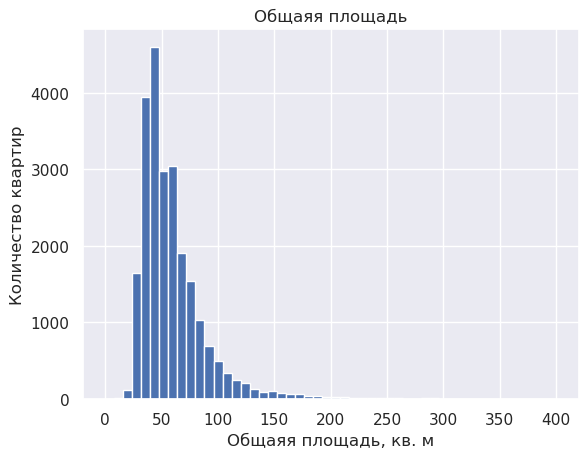

count   23699.00
mean       60.35
std        35.65
min        12.00
25%        40.00
50%        52.00
75%        69.90
max       900.00
Name: total_area, dtype: float64

In [32]:
plt.hist(data['total_area'], bins=50, range = (0,400))
plt.title('Общаяя площадь')
plt.xlabel('Общаяя площадь, кв. м')
plt.ylabel('Количество квартир')
plt.show()
data['total_area'].describe()

**Вывод:** Общая площадь распределена в пределах от 12 до 900 квадратных метров. Средняя площадь - 60 кв. метров. Медианное значение 52 кв. метра. По гистограмме видим распраделение Гаусса

**2.** Жилая площадь

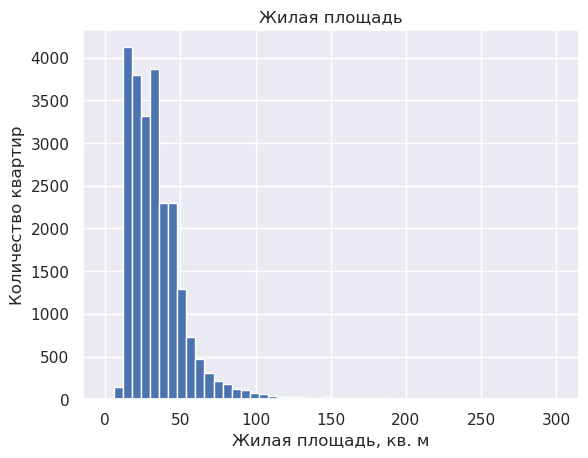

count   23699.00
mean       34.59
std        22.35
min         2.00
25%        19.00
50%        30.00
75%        42.10
max       409.70
Name: living_area, dtype: float64

In [33]:
plt.hist(data['living_area'], bins=50, range = (0,300))
plt.title('Жилая площадь')
plt.xlabel('Жилая площадь, кв. м')
plt.ylabel('Количество квартир')
plt.show()
data['living_area'].describe()

**Вывод:** Жилая площадь распределена в пределах от 2 до 410 квадратных метров. Среднее значение - 34,59 кв. метров. Медианное значение 30 кв. метров. По гистограмме видим распраделение Гаусса. Есть аномальное значение жилой площади в 2 кв. метра

**3.** Площадь кухни

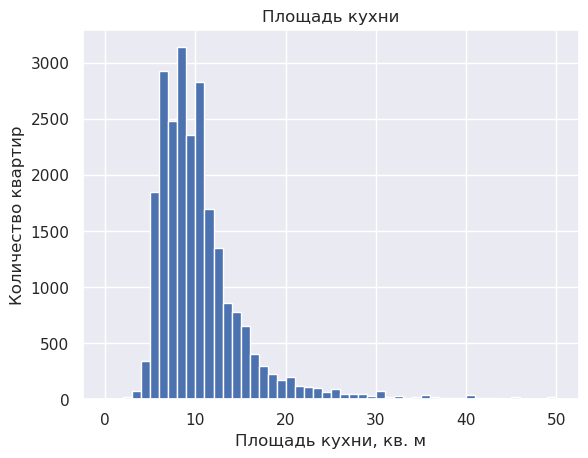

count   23699.00
mean       10.51
std         6.04
min         1.30
25%         7.00
50%         9.00
75%        12.00
max       112.00
Name: kitchen_area, dtype: float64

In [34]:
plt.hist(data['kitchen_area'], bins=50, range = (0,50))
plt.title('Площадь кухни')
plt.xlabel('Площадь кухни, кв. м')
plt.ylabel('Количество квартир')
plt.show()
data['kitchen_area'].describe()

**Вывод:** Прощадь кухонь распределена в пределах от 1,3 до 112 квадратных метров. Среднее значение - 10,51 кв. метров. Медианное значение 9 кв. метров. По гистограмме видим распраделение Гаусса. Есть аномальное значение площади кухни в 1,3 кв. метра

**4.** Цена объекта

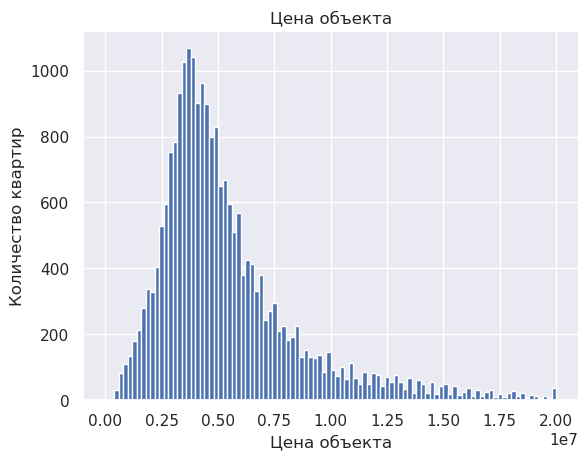

count       23699.00
mean      6541548.77
std      10887013.27
min         12190.00
25%       3400000.00
50%       4650000.00
75%       6800000.00
max     763000000.00
Name: last_price, dtype: float64

In [35]:
plt.hist(data['last_price'], bins=100, range = (0,20000000))
plt.title('Цена объекта')
plt.xlabel('Цена объекта')
plt.ylabel('Количество квартир')
plt.show()
data['last_price'].describe()

**Вывод:** Среднее значение стоимости квартиры - 6 541 548 рублей. 4 650 00 рублей. Присутсвует странная цена квартиры за 12 190 рублей. По гистограмме видим распраделение Гаусса. 

**5.** Количество комнат

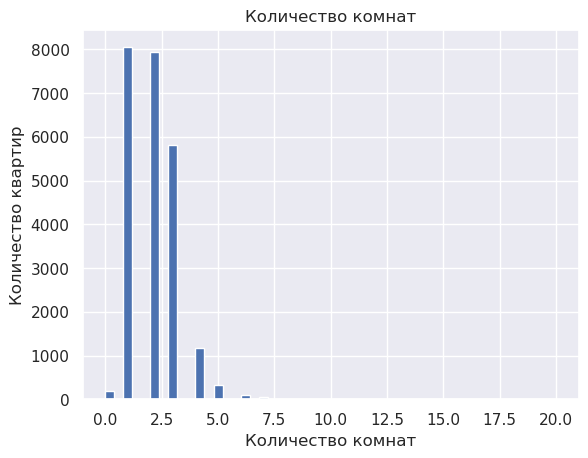

count   23699.00
mean        2.07
std         1.08
min         0.00
25%         1.00
50%         2.00
75%         3.00
max        19.00
Name: rooms, dtype: float64

In [36]:
plt.hist(data['rooms'], bins=50, range = (0,20))
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
data['rooms'].describe()

**Вывод:** С данными все в порядке. Среднее значение комнат в квартирах - 2 комнаты. Ест правда минимальное значение в 0 комнат, но это может быть студия.

**6.** Высота потолков

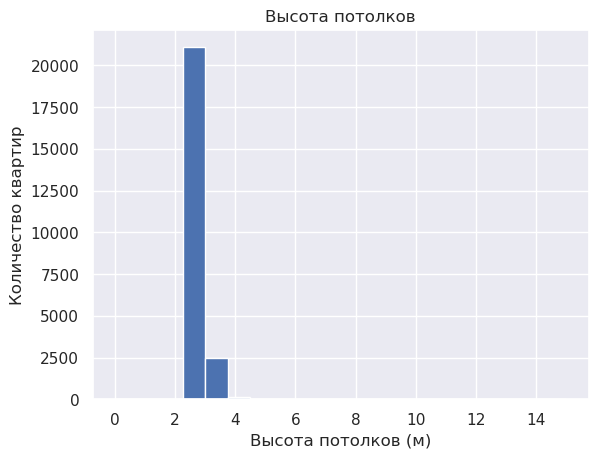

count   23699.00
mean        2.70
std         0.22
min         2.00
25%         2.60
50%         2.65
75%         2.70
max         5.00
Name: ceiling_height, dtype: float64

In [37]:
plt.hist(data['ceiling_height'], bins=20, range = (0,15))
plt.title('Высота потолков')
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество квартир')
plt.show()
data['ceiling_height'].describe()

**Вывод:** С потолками тоже все нормально. Среднее 2,7 метра, Медиана - 2,65 метра.

**7.** Этаж квартиры

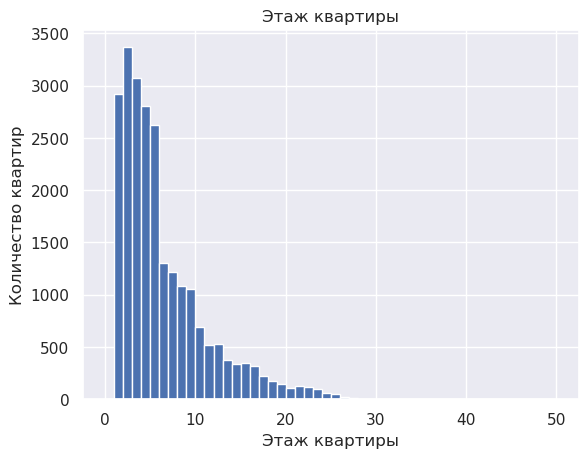

count   23699.00
mean        5.89
std         4.89
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        33.00
Name: floor, dtype: float64

In [38]:
plt.hist(data['floor'], bins=50, range = (0,50))
plt.title('Этаж квартиры')
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество квартир')
plt.show()
data['floor'].describe()

**Вывод:** Квартиры предлагаюся по максимуму на 2 этаже, далее количество предложений уменьшается с возрастанием этажности.

**8.** Тип этажа квартиры («первый», «последний», «другой»)

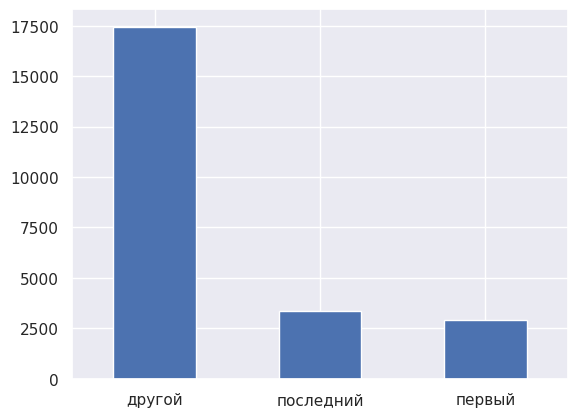

In [39]:
data['floor_category'].value_counts().plot.bar(rot=0)
plt.show()

**Вывод:**  Большинство недвижимости продается между первым и последними этажами

**9.** Общее количество этажей в доме

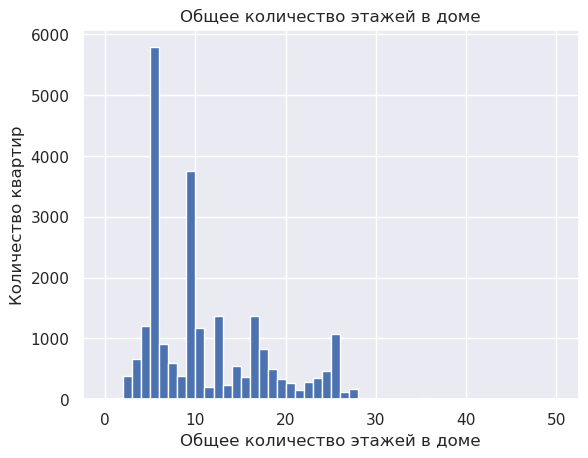

count   23613.00
mean       10.67
std         6.60
min         1.00
25%         5.00
50%         9.00
75%        16.00
max        60.00
Name: floors_total, dtype: float64

In [40]:
plt.hist(data['floors_total'], bins=50, range = (0,50))
plt.title('Общее количество этажей в доме')
plt.xlabel('Общее количество этажей в доме')
plt.ylabel('Количество квартир')
plt.show()
data['floors_total'].describe()

**Вывод:** С данными по этажам все в порядке. Если и 1-этажные дома, есть высотки. Но в среднем больше всего домов в 5 и 9 этажей.

**10.** Расстояние до центра города в метрах 

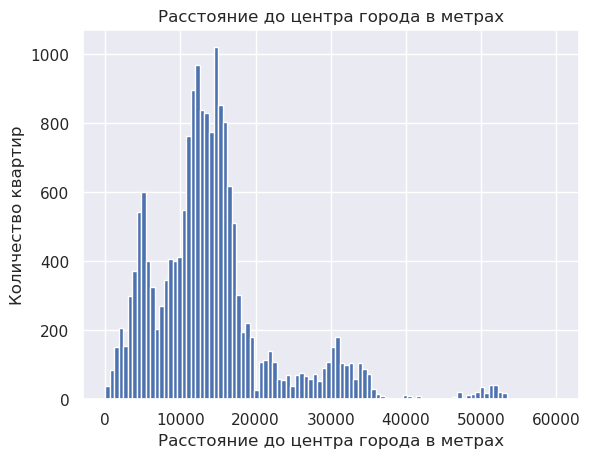

count   18180.00
mean    14191.28
std      8608.39
min       181.00
25%      9238.00
50%     13098.50
75%     16293.00
max     65968.00
Name: cityCenters_nearest, dtype: float64

In [41]:
plt.hist(data['cityCenters_nearest'], bins=100, range = (0,60000))
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество квартир')
plt.show()
data['cityCenters_nearest'].describe()

**Вывод:** В среднем удаление от центра города по предлагаемы квартирам 13- 14 км.

**11.** Расстояние до ближайшего аэропорта

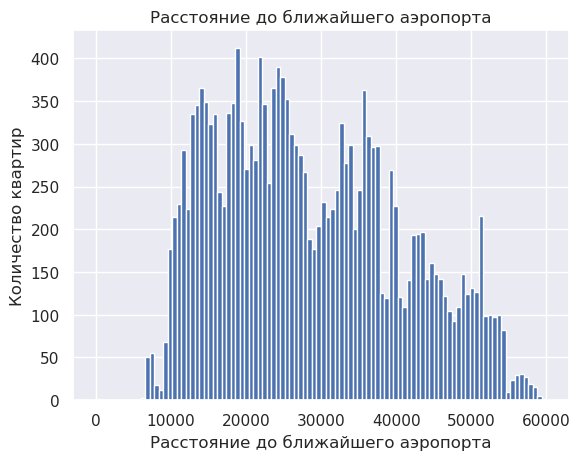

count   18157.00
mean    28793.67
std     12630.88
min         0.00
25%     18585.00
50%     26726.00
75%     37273.00
max     84869.00
Name: airports_nearest, dtype: float64

In [42]:
plt.hist(data['airports_nearest'], bins=100, range = (0,60000))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Количество квартир')
plt.show()
data['airports_nearest'].describe()

**Вывод:** Есть одно аномальное значение 0 км. Как мы видели выше это пропуски данных и их не обрабатывал, т.к. близость к аэропорту не приоритетный параметр при выборе квартиры.

**12.** Расстояние до ближайшего парка

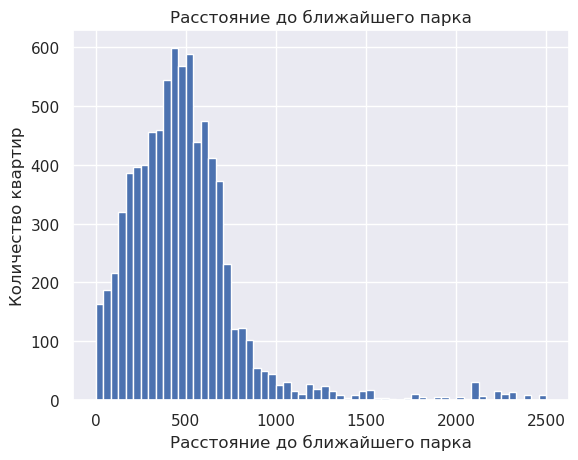

count   8079.00
mean     490.80
std      342.32
min        1.00
25%      288.00
50%      455.00
75%      612.00
max     3190.00
Name: parks_nearest, dtype: float64

In [43]:
plt.hist(data['parks_nearest'], bins=60, range = (0,2500))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество квартир')
plt.show()
data['parks_nearest'].describe()

**Вывод:** С данными все в порядке. Есть квартиры совсем рядом с парками. Есть в 3-х километрах. В среднем до парком 450-500 метров.

**13.** День и месяц публикации объявления.

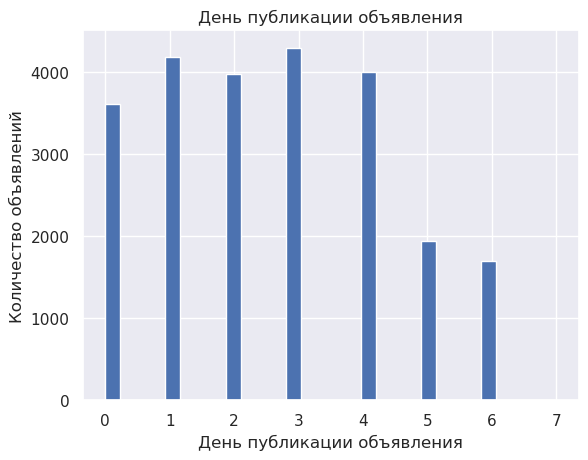

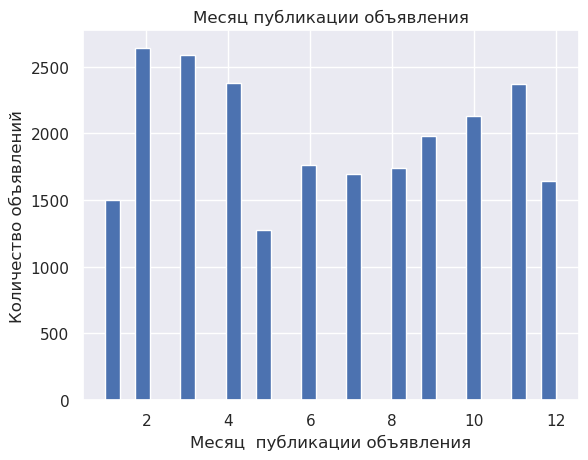

In [44]:
plt.hist(data['weekday_exposition'], bins=30, range = (0,7))
plt.title('День публикации объявления')
plt.xlabel('День публикации объявления')
plt.ylabel('Количество объявлений')
plt.show()
plt.hist(data['month_exposition'], bins=30, range = (1,12))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц  публикации объявления')
plt.ylabel('Количество объявлений')
plt.show()

**Вывод:** По дням распределение объявлений интересное: максимум со вторника по четверг. А воскресение все отдыхают и объявления не размещают. По месяцам меньше всего объявлений в мае, а больше всего в феврале и марте.

**Изучим, как быстро продавались квартиры (столбец `days_exposition`).**

Этот параметр показывает, сколько дней было размещено каждое объявление.

Построим гистограмму. Т.к в пердобработке в данном столбце заменили пропуски на 0 исключим данное значение из дальнейших манипуляций. 

Строим диаграмму размаха

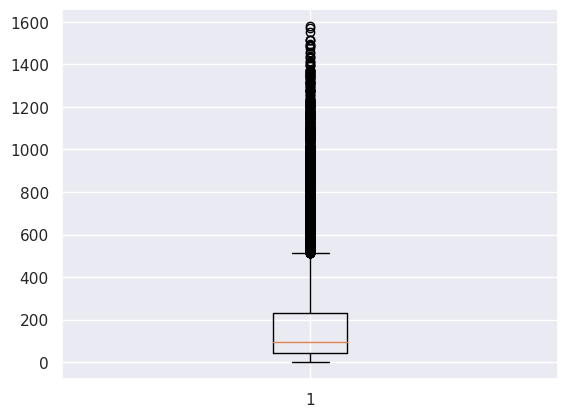

In [45]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.show()

Строим гистограмму в диапазоне размещения объявлений до 1000 дней и в более детализированном диапазоне размещения объявлений до 100 дней 

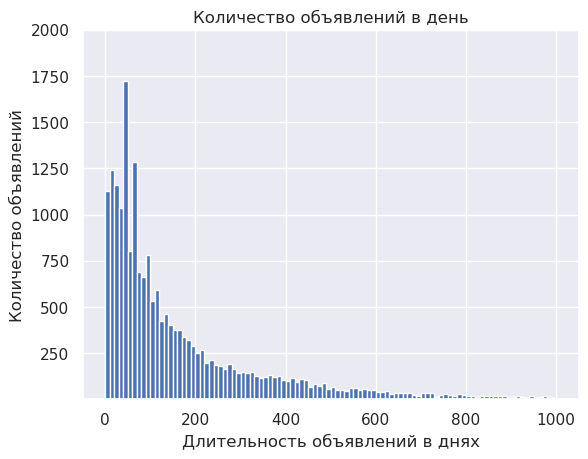

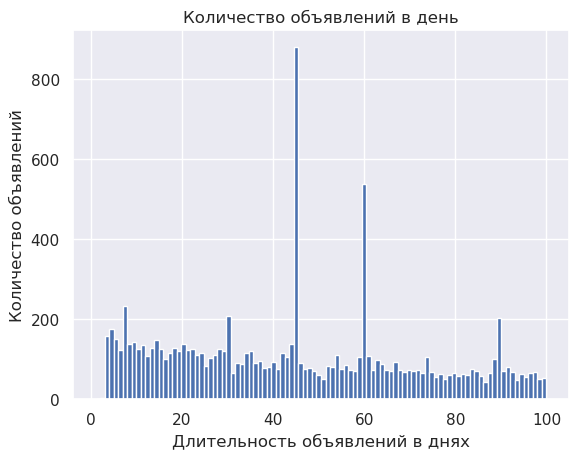

In [46]:
plt.ylim(1,2000)

plt.hist(data[data['days_exposition']!=0]['days_exposition'], bins=100, range = (0,1000))
plt.title('Количество объявлений в день')
plt.xlabel('Длительность объявлений в днях')
plt.ylabel('Количество объявлений')
plt.show() 

plt.hist(data[data['days_exposition']!=0]['days_exposition'], bins=100, range = (1,100))
plt.title('Количество объявлений в день')
plt.xlabel('Длительность объявлений в днях')
plt.ylabel('Количество объявлений')
plt.show() 

Посчитаем среднее и медиану.

In [47]:
data[data['days_exposition']!=0]['days_exposition'].describe()

count   20518.00
mean      180.89
std       219.73
min         1.00
25%        45.00
50%        95.00
75%       232.00
max      1580.00
Name: days_exposition, dtype: float64

По гистограмме мы имеем распределение Пуассона. Среднее значение - 180 дней, а медиана - 95 дней. 
Но посмотрев на более детализированную гистограмму  можно заметить несколько выделяющихся значений. 
Это значения 30, 45, 60, 90 это сроки действия объявлений в яндекс недвижимости - далее видимо сервис оплачивается дополнительно. Можно предположить, что в эти дни чать объявлений снимается. C этими аномальными значениями имеем:
- межквартильный размах - от 45 до 232 дней 
- диаграмма размаха у нас от минимального значения до примерно 500 дней. 
- Долгие объявления - от 500 дней и выше. 
- Нормальные значения у нас лежат от 1 до 500 на данный момент.

Уберем эти аномальные значения и посмотрим на изменения.

Отфильтруем данные от аномалий и запишем их в новый датафрейм filtered_data

In [48]:
filtered_data = data.query('days_exposition != 45 and days_exposition != 30 and days_exposition != 60 and days_exposition != 90 and days_exposition != 0')

Диаграмма размаха

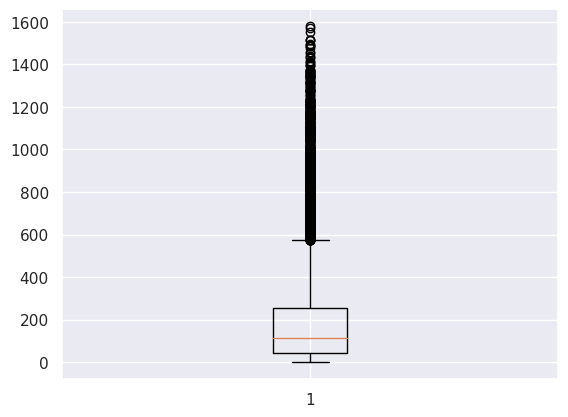

In [49]:
plt.boxplot(filtered_data['days_exposition'])
plt.show()

Строим гистограмму в диапазоне размещения объявлений до 1000 дней и в более детализированном диапазоне размещения объявлений до 100 дней

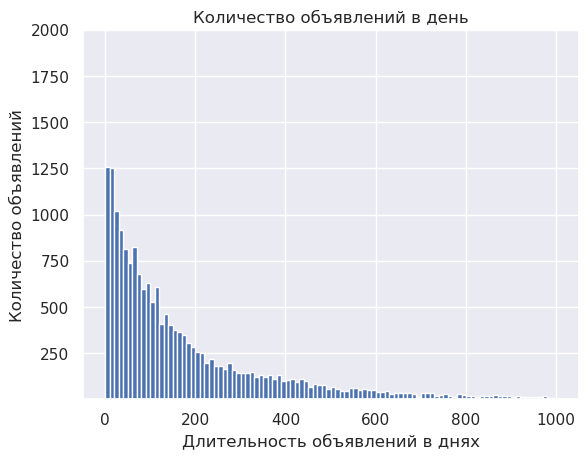

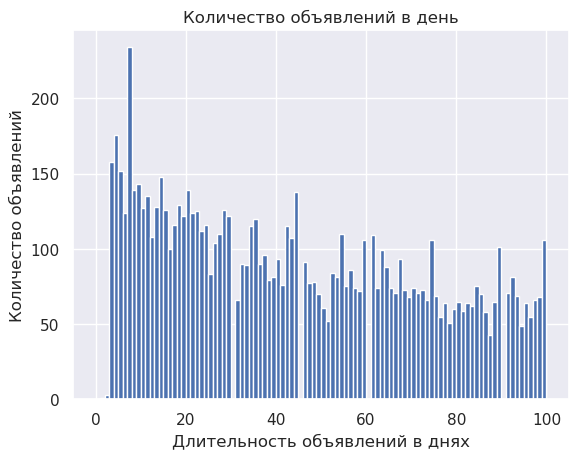

In [50]:
plt.ylim(1,2000)

plt.hist(filtered_data['days_exposition'], bins=100, range = (1,1000))
plt.title('Количество объявлений в день')
plt.xlabel('Длительность объявлений в днях')
plt.ylabel('Количество объявлений')
plt.show() 

plt.hist(filtered_data['days_exposition'], bins=100, range = (0,100))
plt.title('Количество объявлений в день')
plt.xlabel('Длительность объявлений в днях')
plt.ylabel('Количество объявлений')
plt.show()

Cреднее значение, медиана и межквартильный размах

In [51]:
filtered_data['days_exposition'].describe()

count   18688.00
mean      193.44
std       226.31
min         1.00
25%        43.00
50%       112.00
75%       255.00
max      1580.00
Name: days_exposition, dtype: float64

**Вывод:** На выходе после фильтрации получаем:
- среднее - 193 дня
- медиана - 112 дней
- межквартильный размах - от 43 до 255 дней
- долгие обявления уже от 600 дней
- нормальные значения от 1 до 600 дней. 
Анамальный значения все-таки влияли на длительность размещения объявлений. После фильтрации - все показатели увеличились и гисторгаммы стали более ровные.

**Какие факторы больше всего влияют на общую (полную) стоимость объекта?**
Изучим, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

**1.** Проанализируем зависимость стоимости объекта от общей площади и для наглядности от цены кв. метра.

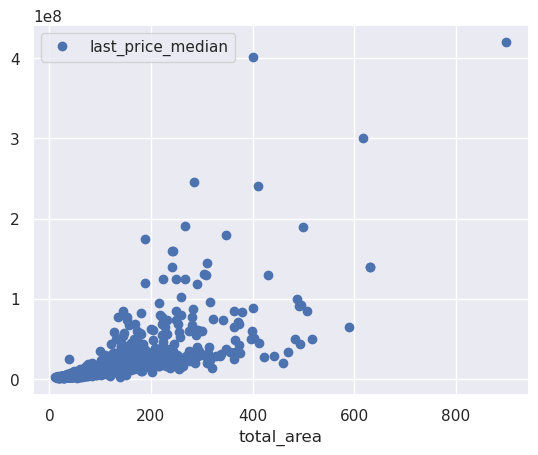

Коэффициент корреляции между общей площадью и ценой квартиры: 0.6536750579657242


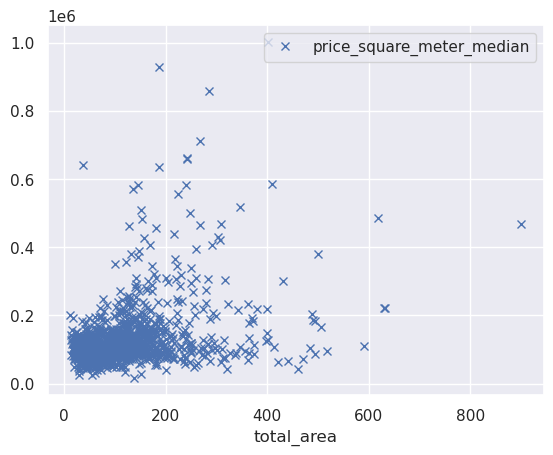

Коэффициент корреляции между общей площадью и ценой кв. м: 0.30196021001472556


In [52]:
pivot_table_total_area_last_price = data.pivot_table(index = 'total_area', values = ['last_price', 'price_square_meter'] , aggfunc = ['median'])
pivot_table_total_area_last_price.columns = ['last_price_median', 'price_square_meter_median']
pivot_table_total_area_last_price.plot(y = 'last_price_median', style = 'o')
plt.show()
print('Коэффициент корреляции между общей площадью и ценой квартиры:',data['total_area'].corr(data['last_price']))
pivot_table_total_area_last_price.plot(y = 'price_square_meter_median', style = 'x')
plt.show()
print('Коэффициент корреляции между общей площадью и ценой кв. м:',data['total_area'].corr(data['price_square_meter']))

**Вывод:** Согласно интерпретации коэффициента корреляции - корреляции между общей площадью и ценой квартиры средняя, а между между общей площадью и ценой кв. м. Зависимость все-таки есть чем больше площадь, тем больше стоимость квартиры. Чем большее площадь квартиры, тем больше стоимость кв. м. 

**2.** Проанализируем зависимость стоимости объекта от жилой площади и для наглядности от цены кв. метра.

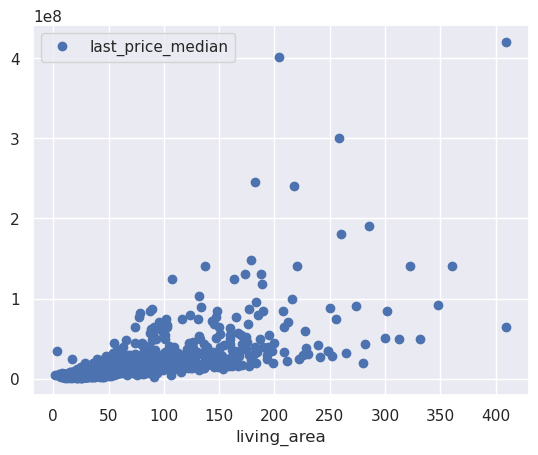

Коэффициент корреляции между жилой площадью и ценой квартиры: 0.585786579150981


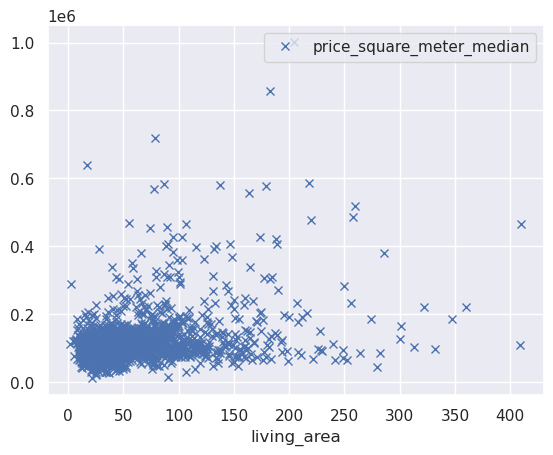

Коэффициент корреляции между жилой площадью и ценой кв. м: 0.23224320940211926


In [53]:
pivot_table_living_area_last_price = data.pivot_table(index = 'living_area', values = ['last_price', 'price_square_meter'] , aggfunc = ['median'])
pivot_table_living_area_last_price.columns = ['last_price_median', 'price_square_meter_median']
pivot_table_living_area_last_price.plot(y = 'last_price_median', style = 'o')
plt.show()
print('Коэффициент корреляции между жилой площадью и ценой квартиры:',data['living_area'].corr(data['last_price']))
pivot_table_living_area_last_price.plot(y = 'price_square_meter_median', style = 'x')
plt.show()
print('Коэффициент корреляции между жилой площадью и ценой кв. м:',data['living_area'].corr(data['price_square_meter']))

**Вывод:** Корреляция 0.58 - средняя. Зависимость есть, но не очень сильная (чем больше жилая площадь, тем больше стоимость квартиры). Корреляция между жилой площадью и ценой кв. м 0,23 слабая, но все таки она есть. Кв. метр немноко дорожает, при увеличение жилой площади. 

**3.** Проанализируем зависимость стоимости объекта от площади кухни и для наглядности от цены кв. метра.

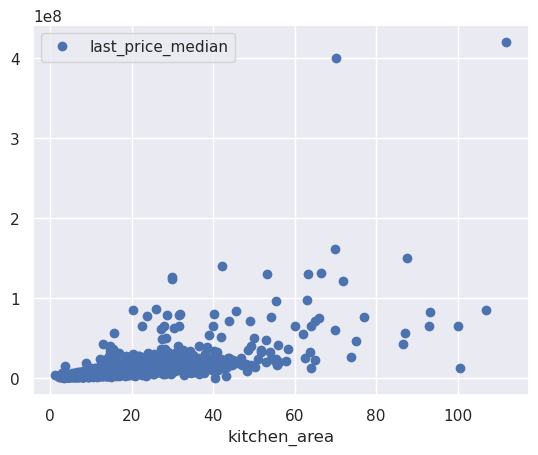

Коэффициент корреляции между площадью кухни и ценой квартиры: 0.5141544349665675


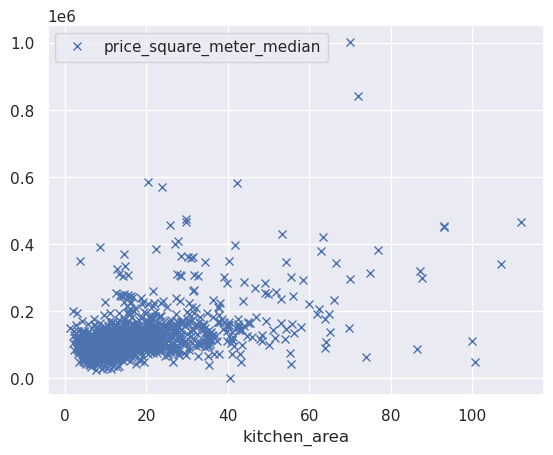

Коэффициент корреляции между площадью кухни и ценой кв. м: 0.38211599364347726


In [54]:
pivot_table_kitchen_area_last_price = data.pivot_table(index = 'kitchen_area', values = ['last_price', 'price_square_meter'] , aggfunc = ['median'])
pivot_table_kitchen_area_last_price.columns = ['last_price_median', 'price_square_meter_median']
pivot_table_kitchen_area_last_price.plot(y = 'last_price_median', style = 'o')
plt.show()
print('Коэффициент корреляции между площадью кухни и ценой квартиры:',data['kitchen_area'].corr(data['last_price']))
pivot_table_kitchen_area_last_price.plot(y = 'price_square_meter_median', style = 'x')
plt.show()
print('Коэффициент корреляции между площадью кухни и ценой кв. м:',data['kitchen_area'].corr(data['price_square_meter']))

**Вывод:** Корреляция 0.51 - средняя. Зависимость есть, но не очень сильная (чем больше площадь кухни, тем больше стоимость квартиры). С кв. метров чуть слабее.

**4.** Проанализируем зависимость стоимости объекта от количества комнат и для наглядности от цены кв. метра.

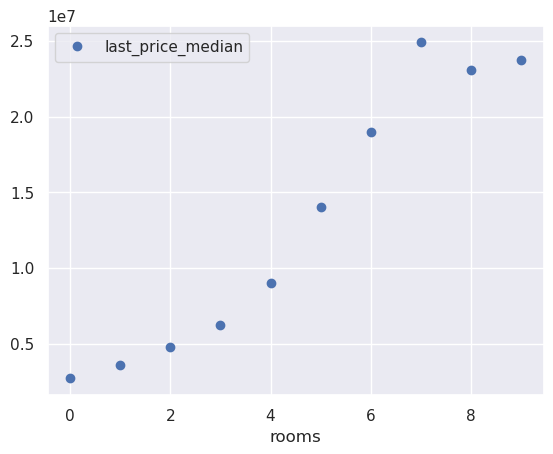

Коэффициент корреляции между количетсвом комнат и ценой квартиры: 0.3633428499648955


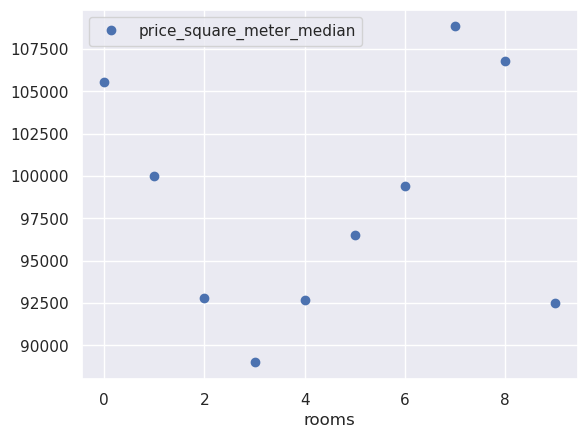

Коэффициент корреляции между количетсвом комнат  и ценой кв. м: 0.05541965593528792


In [55]:
pivot_table_total_area_rooms = data.pivot_table(index = 'rooms', values = ['last_price', 'price_square_meter'] , aggfunc = ['median'])
pivot_table_total_area_rooms.columns = ['last_price_median', 'price_square_meter_median']
pivot_table_total_area_rooms.query('rooms < 10').plot(y = 'last_price_median', style = 'o')
plt.show()
print('Коэффициент корреляции между количетсвом комнат и ценой квартиры:',data['rooms'].corr(data['last_price']))
pivot_table_total_area_rooms.query('rooms < 10').plot(y = 'price_square_meter_median', style = 'o')
plt.show()
print('Коэффициент корреляции между количетсвом комнат  и ценой кв. м:',data['rooms'].corr(data['price_square_meter']))

**Вывод:** Корреляция почти 0.36 - слабая. Зависимость есть. То есть, чем больше комнат, тем немного выше стоимость, а вот зависимости цены квадрата от количества комнат не наблюдается

**5.** Проанализируем зависимость стоимости объекта от этажа, на котором расположена квартира (первый, последний, другой).

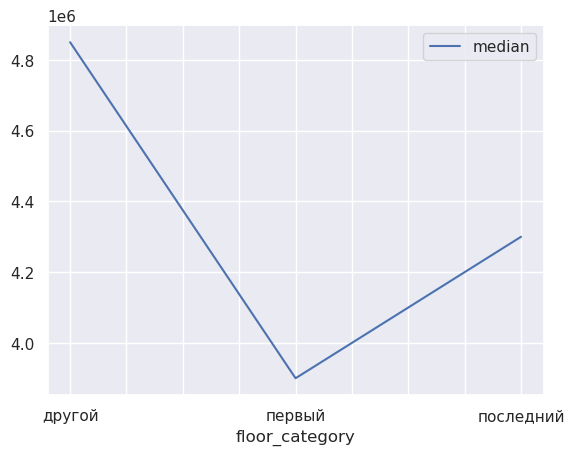

In [56]:
pivot_table_total_area_floor_category = data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area_floor_category.columns = ['mean', 'count', 'median']
pivot_table_total_area_floor_category.plot(y = 'median')
plt.show()

**Вывод:** Самые дешевые квартиры на первом этаже. На последнем дороже, а самые дорогие распределились между ними.

**6.** Проанализируем зависимость стоимости объекта от даты размещения (день недели, месяц, год).

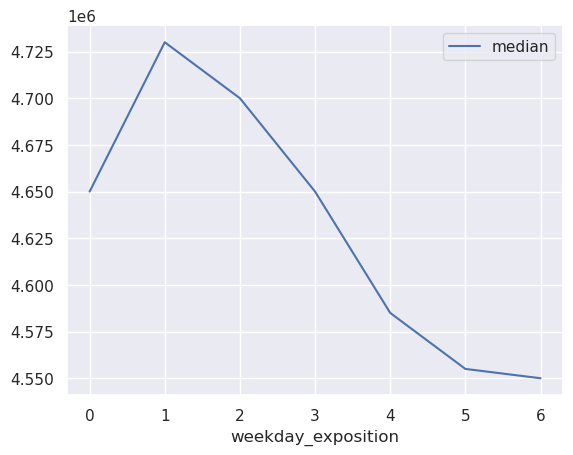

Коэффициент корреляции между ценой объекта и днем размещения объявления: 0.0015501452176215438


In [57]:
pivot_table_total_area_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_total_area_weekday_exposition.plot(y = 'median')
plt.show()
print('Коэффициент корреляции между ценой объекта и днем размещения объявления:',data['last_price'].corr(data['weekday_exposition']))

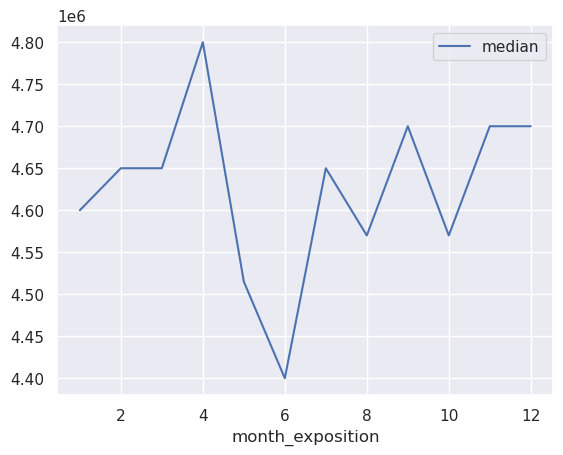

Коэффициент корреляции между ценой объекта и месяцем размещения объявления: 0.0027791287507397235


In [58]:
pivot_table_total_area_month_exposition = data.pivot_table(index = 'month_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_total_area_month_exposition.plot(y = 'median')
plt.show()
print('Коэффициент корреляции между ценой объекта и месяцем размещения объявления:',data['last_price'].corr(data['month_exposition']))

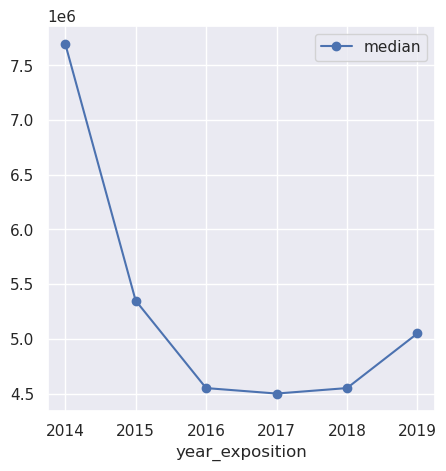

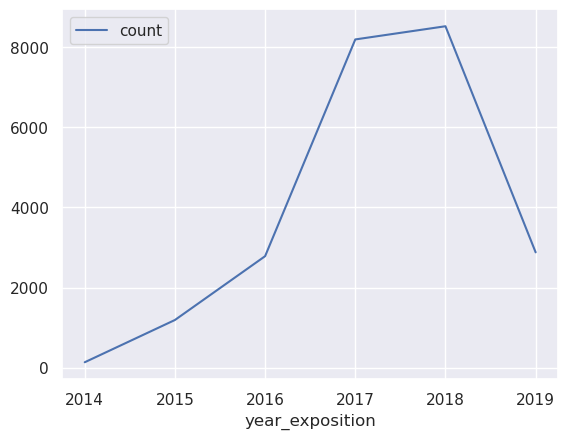

In [59]:
pivot_table_total_area_year_exposition = data.pivot_table(index = 'year_exposition', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_total_area_year_exposition.plot(y = 'median', grid=True, style='o-', figsize=(5, 5))
plt.show()
pivot_table_total_area_year_exposition.plot(y = 'count')
plt.show()

**Вывод:** Корреляция в трех вариантах околонулевая. Но есть особенности:
- по дням недели пик приходится на вторник, а минимум на субботу. В воскресение все отдыхают.
- по месяцам идет рост до апреля, май - июнь падение и далее пилообразный рост. Падения видимо связаны с началом дачно-отпускного периода.
- по годам видим падение стоимости 2014 по 2016, далее боковое движение и небольшой рост с 2018 года. Скорее всего это связано с особенностями рынка недвижимости и покупательной способности после резкого роста курса доллара в 2014 году и увеличением ставки ЦБ, а соответсвенно удорожанием кредитов, а вот количество объявлений о продаже наоборот начало расти с 2014 по 2018 года. Если визуально наложить графики друг на друга можно увидить кривые спроса и предложения..

**Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.** Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`.

In [60]:
locality_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_square_meter', aggfunc=['count', 'mean'])
locality_pivot_table.columns = ['count', 'mean']
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
display(locality_pivot_table)
#самая высокая стоимость
display(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].max()])
#самая низкая стоимость
display(locality_pivot_table[locality_pivot_table['mean']==locality_pivot_table['mean'].min()])

,count,mean
locality_name,,
Санкт-Петербург,15721,114849.01
Мурино,590,86087.51
Кудрово,472,95324.93
посёлок Шушары,440,78677.36
Всеволожск,398,68654.47
Пушкин,369,103125.82
Колпино,338,75424.58
посёлок Парголово,327,90175.91
Гатчина,307,68746.15


,count,mean
locality_name,,
Санкт-Петербург,15721,114849.01


,count,mean
locality_name,,
Выборг,237,58141.91


**Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра (изменение средней цены кв. метра при удалении от центра).** Посмотрим, как стоимость объектов зависит от расстояния до центра города.

In [61]:
pivot_table_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(index = 'cityCenters_nearest_km', values = 'price_square_meter', aggfunc = 'mean')
display(pivot_table_km)

,price_square_meter
cityCenters_nearest_km,
0.00,245833.53
1.00,177005.41
2.00,157849.01
3.00,121387.45
4.00,133282.87
5.00,140509.79
6.00,151012.19
7.00,156176.88
8.00,125671.44


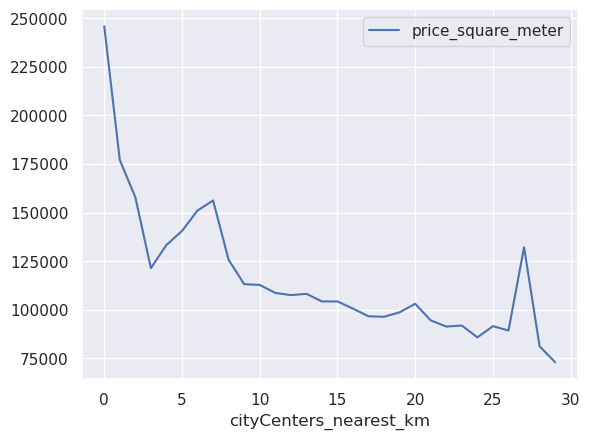

In [62]:
pivot_table_km.plot(grid=True)
plt.show()

Т.к. границу в центр города можно принять 7 км, посмотрим для наглядности график после 7-го км.

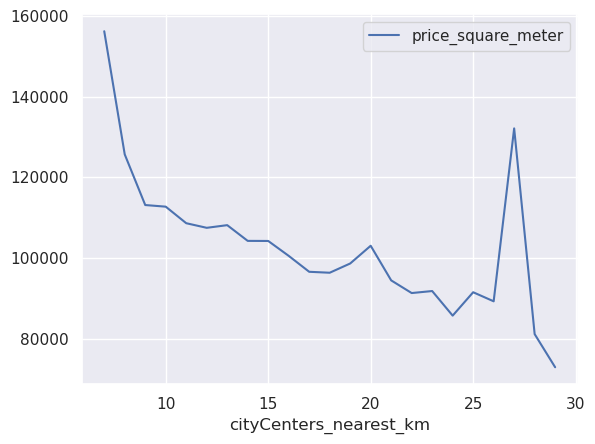

In [63]:
pivot_table_km7 = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km >= 7').pivot_table(index = 'cityCenters_nearest_km', values = 'price_square_meter', aggfunc = 'mean')
pivot_table_km7.plot(grid=True)
plt.show()

Глядя на график можно провести границу в 7 км, после этой отсечки идем на уменьшение стоимости, хотя есть и всплекс на 27-м км, но там видимоо что-то очень дорогое))

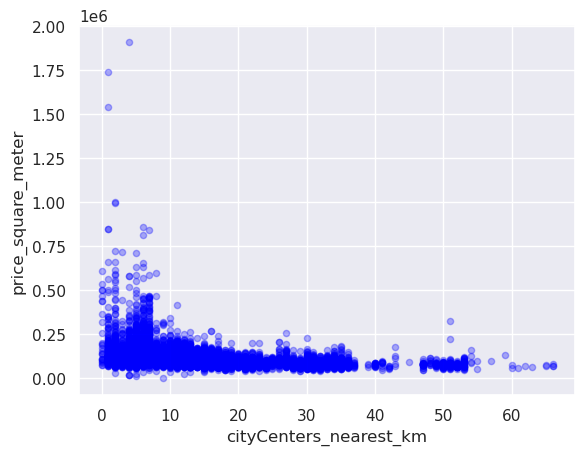

Коэффициент корреляции между ценой кв.метра и удалением от центра: -0.31867747652775963


In [64]:
data.plot(kind = 'scatter', y = 'price_square_meter', x = 'cityCenters_nearest_km', alpha = 0.3, c = ['blue'][0])
plt.show()
print('Коэффициент корреляции между ценой кв.метра и удалением от центра:', data['cityCenters_nearest_km'].corr(data['price_square_meter']))

**Вывод:**  Коээфициент корреляции хоть и слабый, но зависимость видна. 
С постепенным удалением от центра города снижается стоимость квадрадного метра.

### Общий вывод

На этапе предобрабоки:
- был обработан архивный файл с данными.
- обработаны пропуски и изменены типы данных там, где это возможно
- исправили неявные дубликаты и заменили ошибочные значения.

Далее добавили несколко столбцов для дальнейшего иссдедования данных:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах;

Проведя исследовательский анализ были выявлены зависимости стоимости жилья от различных параметров и найдена аномалия в размещении объявлений о продаже квартир.
- значения 30, 45, 60, 90 в объявлениях о продаже квартир оказались аномальными, т.к. это оказались предельные сроки действия объялений яндекс недвижимости. После фильтрации распределение стало более ровным и сроки действия объяевлений чуть увеличились;

В среднем квартиры продаются за 112 дней, есть максимально быстрая продажа за 1 день, есть очень долгие - более 600 дней. 

- цена на объект недвижимости увеличивается при увеличенни следующих параметров:
     - общая площадь;
     - жилая площадь;
     - площадь кухни;
     - количество комнат;
- самые дешевые квартиры на первом этаже;
- есть зависимость по размещению объявлени в зависимости от дня недели, месяца и года:
     - по дням недели пик приходится на середину недели в рабочие дни, в субботу минимум объявлений, а в воскресение все отдхают;
     - по месяца присутсвует элемент сезонности - спад кол-ва объявлений в мае и июне;
     - по годам присутсвует влияние экономический факторов, падение с 2014 по 2016, далее боковое движение и небольшой рост с 2018 года. Скорее всего это связано с особенностями рынка недвижимости и покупательной способности после резкого роста курса доллара в 2014 году и увеличением ставки ЦБ, а соответсвенно удорожанием кредитов,а вот количество объявлений о продаже наоборот начало расти с 2014 по 2018 года;

Стоимость квадратного метра в топ-10 населённых пунктов:
- Самый дорогой средний квадратный метр  в Санкт-Петербурге - 114849,00 рублей
- Самый дешевый квадратный метр в Выборге - 58141,91рублей

Большинство квартир продается в типовых 5-ти и 9-ти этажных домах.
В среднем квартиры 2-х комнатные.

Цена на объект недвижимости в г.Санкт-Петербург зависит от расстояния от центра города (самый дорогой кв. метр в самом центре 245833.53, рублей) в сторону уменьшения (есть небольшие всплески цены кв. метра при удалении от центра, но это вполне может быть из катекогории элитной недвижимости с дорогими квадратными метрами)

Границу центра можно провести по отметке в 7-км. 


